# Information and Network Security - INS

Team Project - Section - 030

Venkata Sai Siva Padmini Surekha Aripirala - 999903261

Keerthi Reddy Chimalapati - 999903554

Sai Kiran Duvvuri - 999902946

Package Installation: Installs necessary packages (scipy, seaborn, tensorflow, tensorflow-io) using pip

In [52]:
# Install necessary packages using pip
!pip install scipy
!pip install seaborn
!pip install tensorflow==2.12.0 tensorflow-io==0.29.0


Package Importing: Imports required packages (pandas, numpy, tensorflow, matplotlib.pyplot, seaborn, LabelEncoder) for data manipulation, analysis, and visualization.

In [53]:
# Import the installed packages
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

##Reading the Datasets

In [54]:
data = pd.read_csv("/content/drive/MyDrive/drebin-215-dataset-5560malware-9476-benign.csv", encoding="utf-8", low_memory=False)
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [55]:
df = pd.read_csv("/content/drive/MyDrive/dataset-features-categories.csv", encoding="utf-8")
df.head()


,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature


# Preprocessing the data

In [56]:
# Handling missing values
data.replace(['?', 'S'], np.nan, inplace=True)
data.dropna(inplace=True)
# Encoding categorical class labels
lbl_enc = LabelEncoder()
data['class'] = lbl_enc.fit_transform(data['class'])
# Converting all columns to numeric type
data = data.apply(pd.to_numeric)

Preprocesses the data by replacing class labels, finding categorical columns, and splitting it into features and target variable.



In [57]:
data.dtypes

transact                      int64
onServiceConnected            int64
bindService                   int64
attachInterface               int64
ServiceConnection             int64
                              ...  
ACCESS_FINE_LOCATION          int64
SET_WALLPAPER_HINTS           int64
SET_PREFERRED_APPLICATIONS    int64
WRITE_SECURE_SETTINGS         int64
class                         int64
Length: 216, dtype: object

Performs data visualization to explore the dataset:

In [58]:
classes,count = np.unique(data['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
data = data.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
data=data.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(data.isna().sum())))
data.dropna(inplace=True)
for c in data.columns:
    data[c] = pd.to_numeric(data[c])
data

[0] [0]
Total missing values :  0


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
5560,1,1,1,1,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
5561,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,0,0,0,0
5562,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [59]:
data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
5560,1,1,1,1,1,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
5561,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,1,0,0,0,0
5562,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#DATA VISUALISATIONS

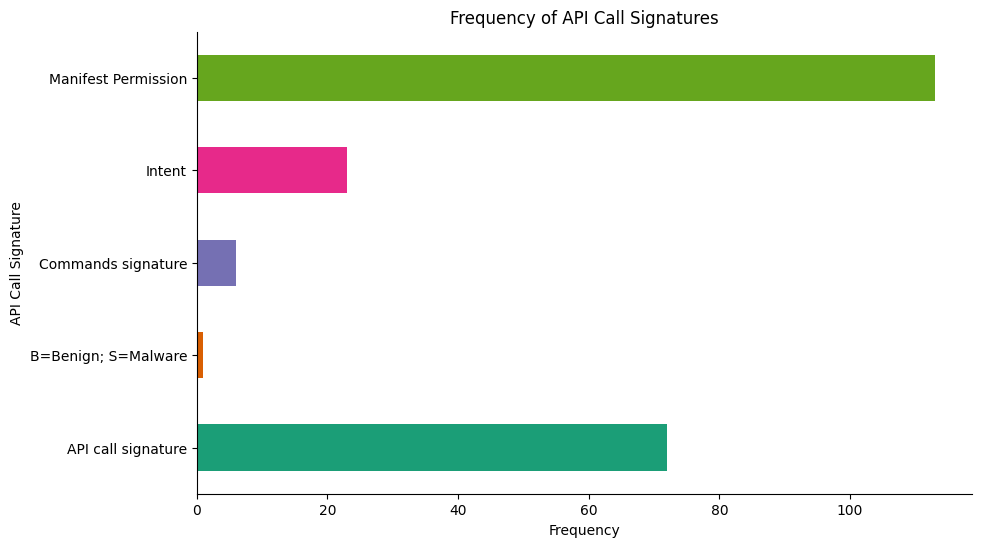

In [60]:
# Visualization 1: Bar plot of API call signatures frequency
plt.figure(figsize=(10, 6))
df.groupby('API call signature').size().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Frequency of API Call Signatures')
plt.xlabel('Frequency')
plt.ylabel('API Call Signature')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

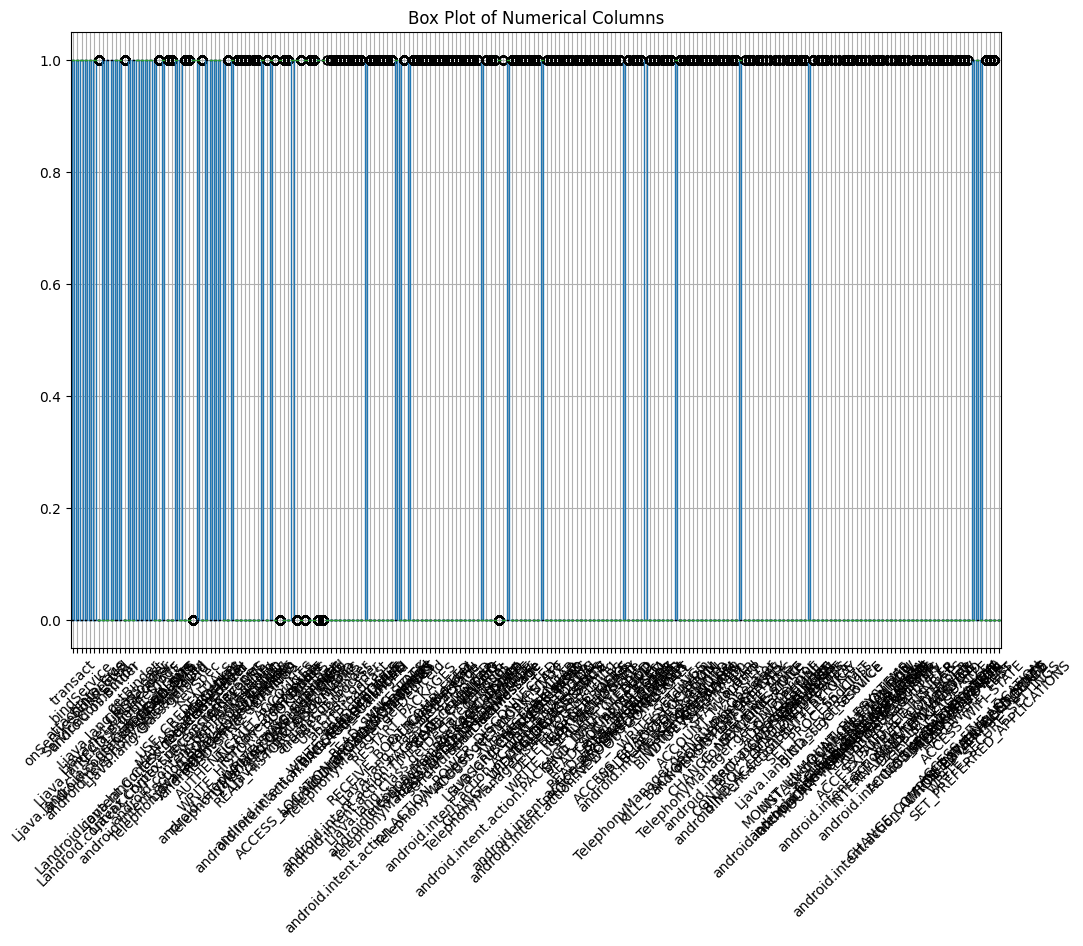

In [61]:
# Visualization 2: Box plot of numerical columns in data
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


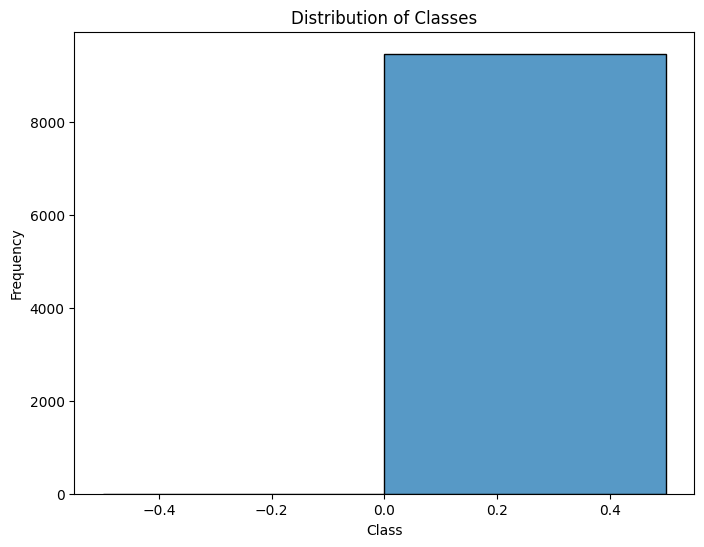

In [62]:
# Visualization 3: Histogram of class distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['class'], bins=2, kde=False)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


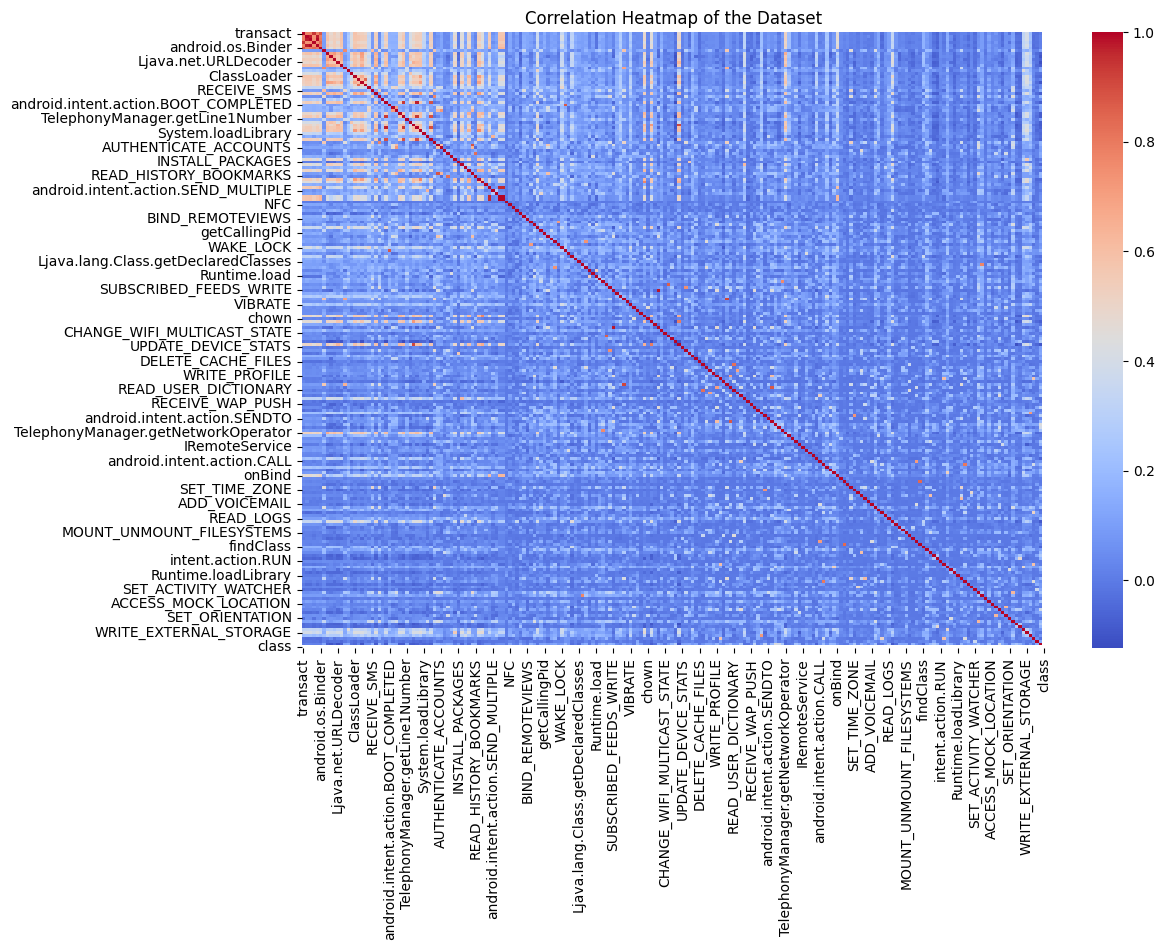

In [63]:
# Visualization 4: Correlation heatmap of the dataset
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of the Dataset")
plt.show()

In [64]:
#Dataset Columns
print(data.columns)

Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)


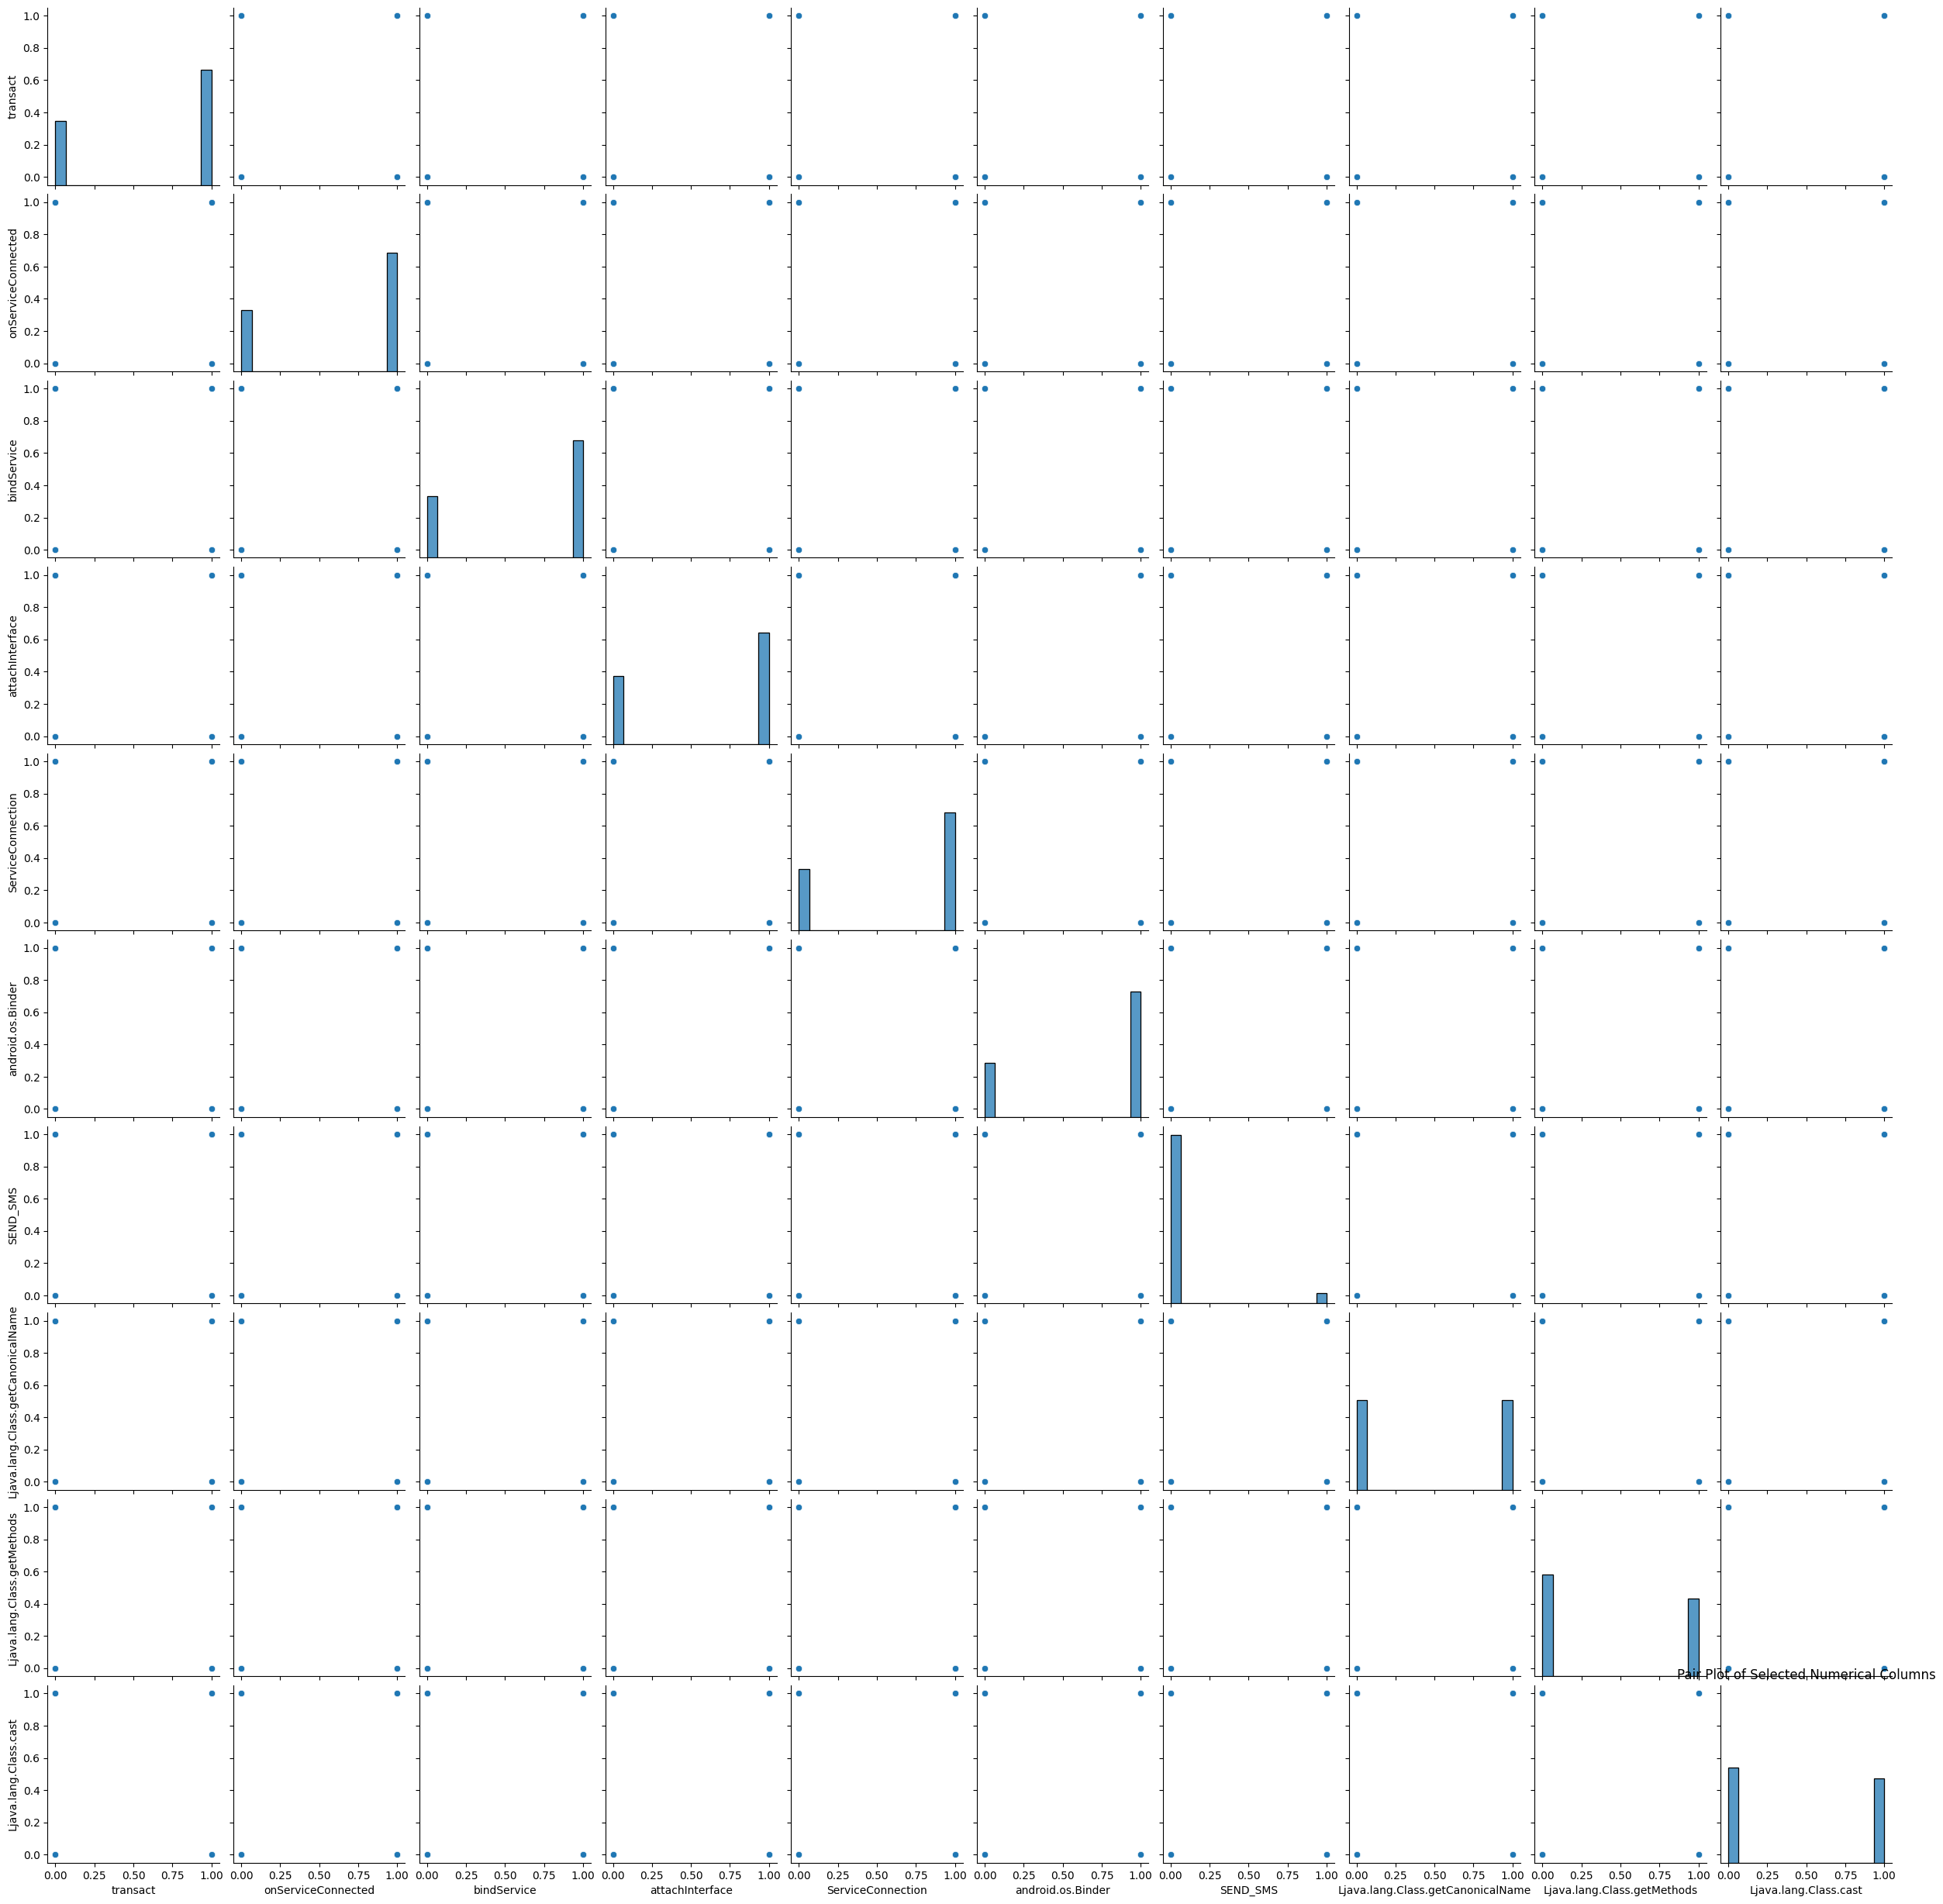

In [65]:
# Visualization 5: Pair plot of selected numerical columns
selected_columns = ['transact', 'onServiceConnected', 'bindService', 'attachInterface',
                    'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
                    'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
                    'Ljava.lang.Class.cast']

# Replaced with provided column names
sns.pairplot(data[selected_columns])
plt.title('Pair Plot of Selected Numerical Columns')
plt.show()

##MILESTONE 2 STARTS FROM *HERE*

# Section 2: Exploratory Data Analysis (EDA), Feature Engineering,

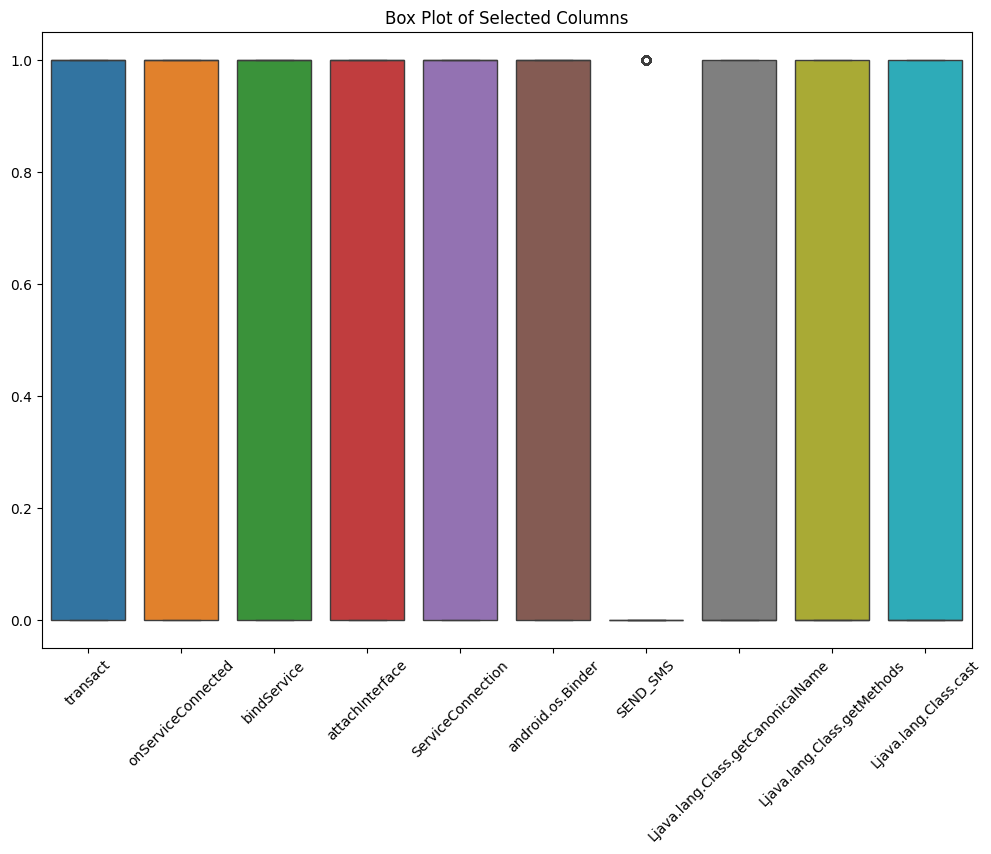

<Figure size 1200x800 with 0 Axes>

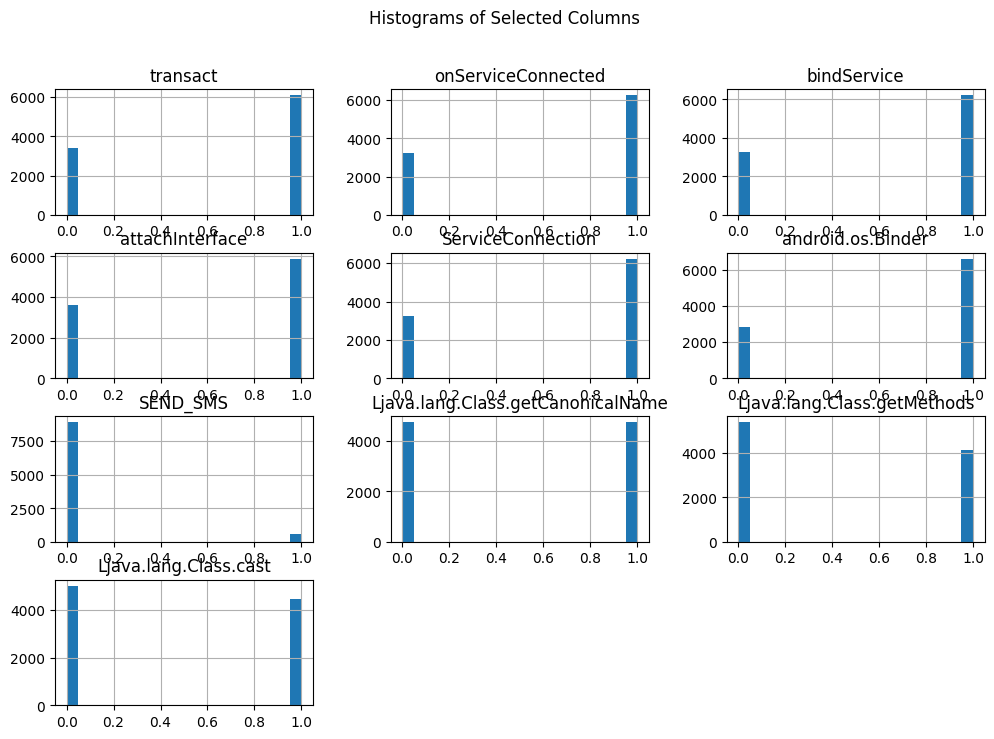

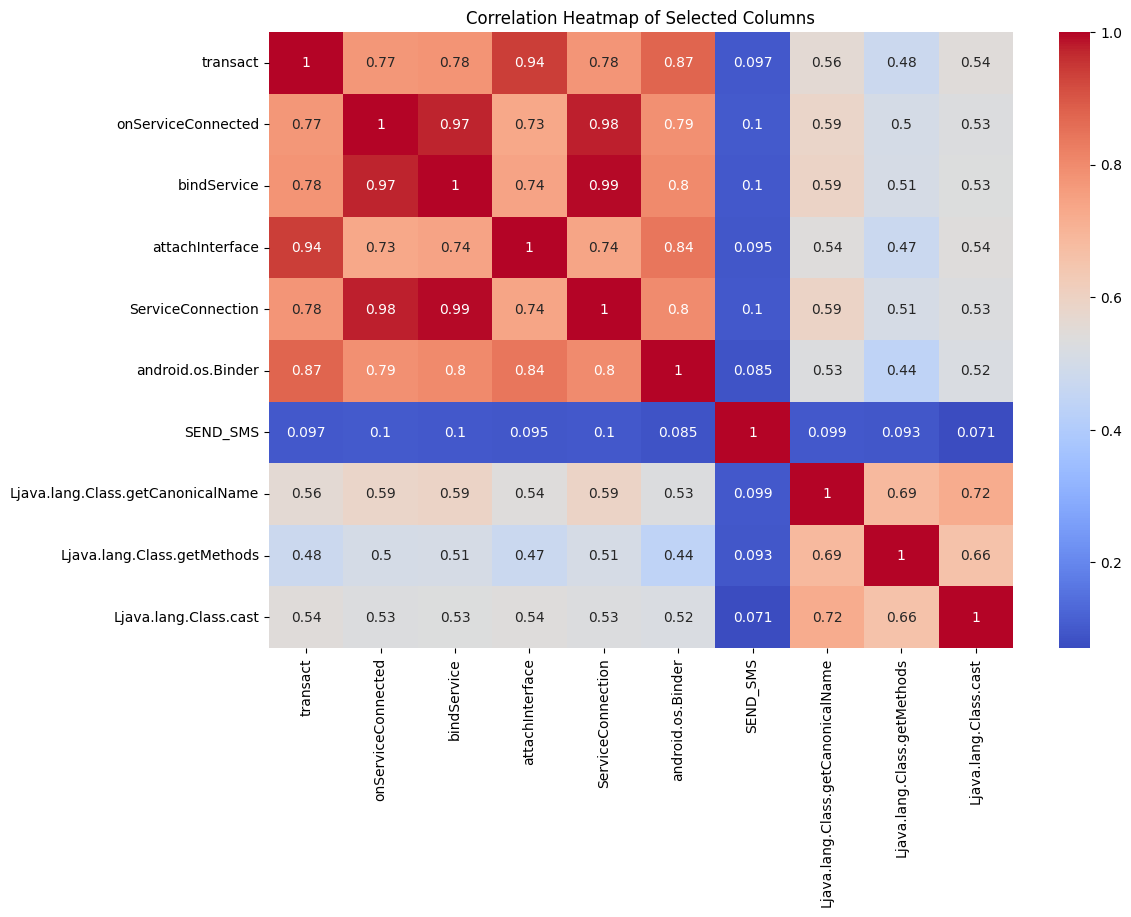

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data from DataFrame containing the selected columns
selected_columns = ['transact', 'onServiceConnected', 'bindService', 'attachInterface',
                    'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
                    'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
                    'Ljava.lang.Class.cast']

selected_data = data[selected_columns]

# Visualizing the distribution of data in selected columns using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_data)
plt.title('Box Plot of Selected Columns')
plt.xticks(rotation=45)
plt.show()

# Visualizing the distribution of data in selected columns using histograms
plt.figure(figsize=(12, 8))
selected_data.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histograms of Selected Columns')
plt.show()

# Visualizing the correlation between selected columns using a heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(selected_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Columns")
plt.show()


##FEATURE SELECTION ENGINEERING


In [67]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Assuming the data from DataFrame containing the selected columns
selected_columns = ['transact', 'onServiceConnected', 'bindService', 'attachInterface',
                    'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
                    'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
                    'Ljava.lang.Class.cast']

selected_data = data[selected_columns]

# performing feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# performing feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
selected_features = selector.fit_transform(scaled_data, data['transact'])

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = selected_data.columns[selected_indices]

# Printing the names of the selected features
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)


Selected Features:
onServiceConnected
bindService
attachInterface
ServiceConnection
android.os.Binder


##FEATURES AND METHODS IMPLEMENTED


1. Identify a Subset of Features:

In [68]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming the data from DataFrame containing the selected columns
selected_columns = ['transact', 'onServiceConnected', 'bindService', 'attachInterface',
                    'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
                    'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
                    'Ljava.lang.Class.cast']


X = data[selected_columns]
y = data['ServiceConnection']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a model using all selected features
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model performance on the test set
y_pred = model.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred)

# Selecting a subset of features based on feature importances
feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
top_features = sorted_indices[:5]  # Select top 5 features

# Subset of selected features
X_subset = X.iloc[:, top_features]


2. Determine the Most Important Features:


In [69]:
# Print the names of the most important features
print("Top 5 Most Important Features:")
for idx in top_features:
    print(selected_columns[idx])


Top 5 Most Important Features:
ServiceConnection
bindService
onServiceConnected
android.os.Binder
transact


3. Assess the Potential Performance of a Simplified Model:

In [70]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming the data from DataFrame containing the selected columns
selected_columns = ['transact', 'onServiceConnected', 'bindService', 'attachInterface',
                    'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
                    'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
                    'Ljava.lang.Class.cast']

selected_data = data[selected_columns]

# performing feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# performing feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
selected_features = selector.fit_transform(scaled_data, data['transact'])

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = selected_data.columns[selected_indices]

# Print the names of the selected features
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

# Save selected features to a text file
file_path = "selected_features.txt"
with open(file_path, "w") as file:
    for feature in selected_feature_names:
        file.write(feature + "\n")

print(f"Selected features saved to {'/content/drive/MyDrive/drebin-215-dataset-5560malware-9476-benign.csv'}")


Selected Features:
onServiceConnected
bindService
attachInterface
ServiceConnection
android.os.Binder
Selected features saved to /content/drive/MyDrive/drebin-215-dataset-5560malware-9476-benign.csv


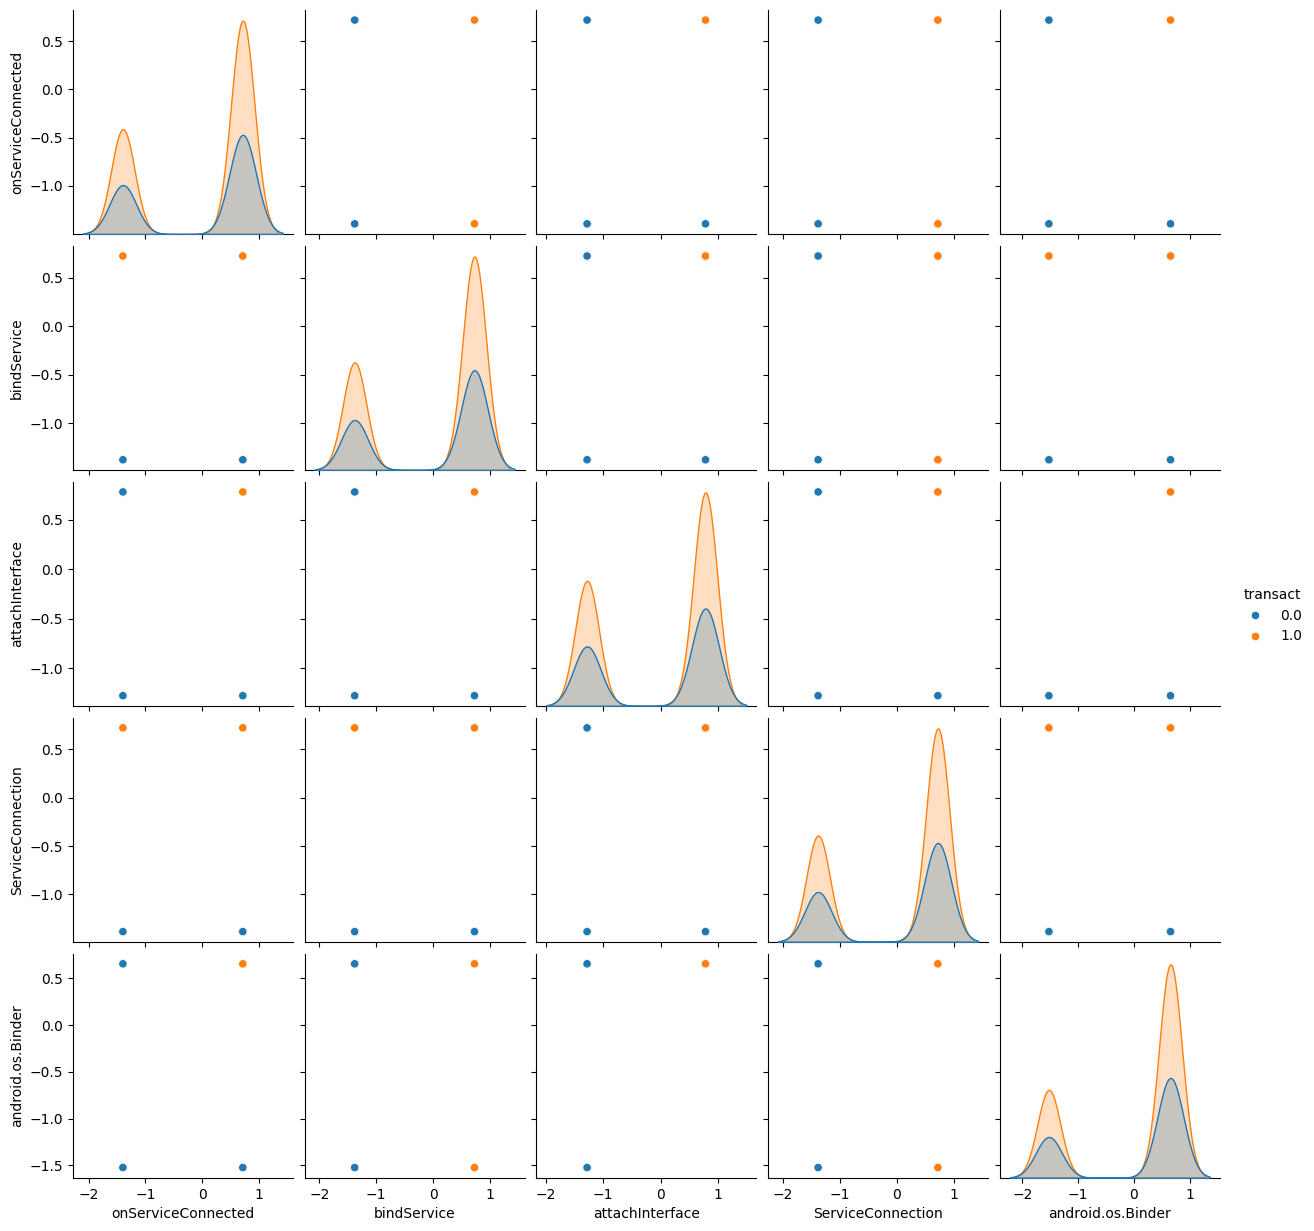

In [71]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Converting the selected features array to a DataFrame
selected_features_df = pd.DataFrame(selected_features, columns=selected_feature_names)

# Combining the selected features DataFrame with the target variable 'transact'
selected_features_df['transact'] = data['transact']

# Plotting a pairplot
sns.pairplot(selected_features_df, hue='transact')
plt.show()


Feature Transformation Analysis

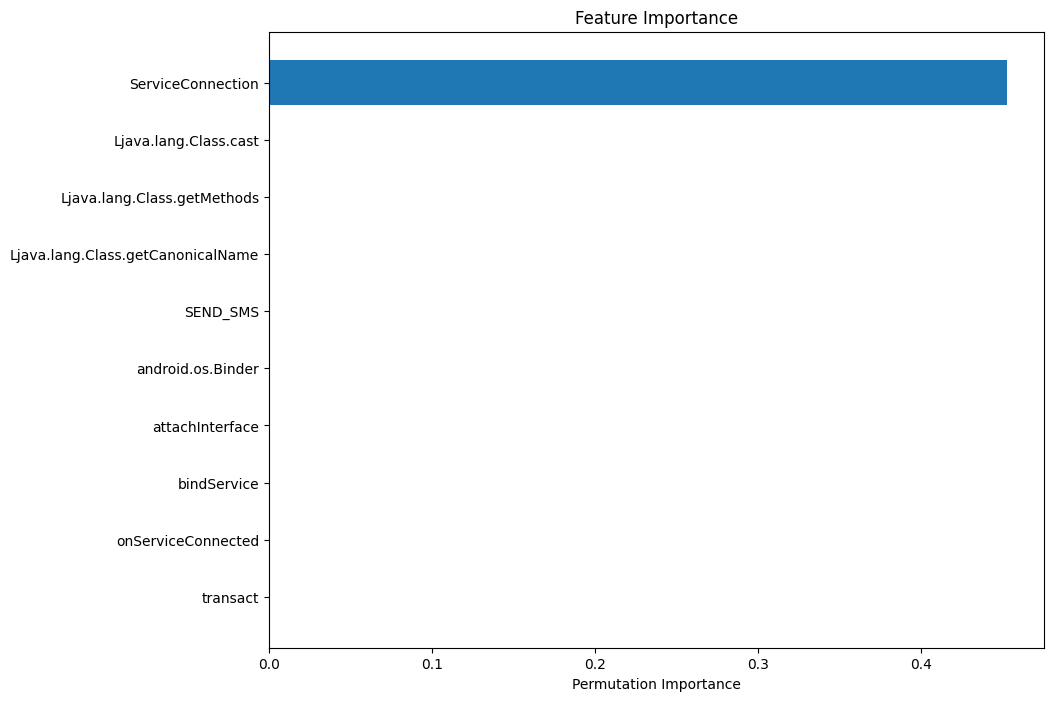

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a RandomForestClassifier as a Feature Transmission Analysis
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculating permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Extracting feature importance scores and their names
feature_importance = perm_importance.importances_mean
feature_names = X.columns

# Sorting features by importance score
sorted_idx = feature_importance.argsort()

# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()


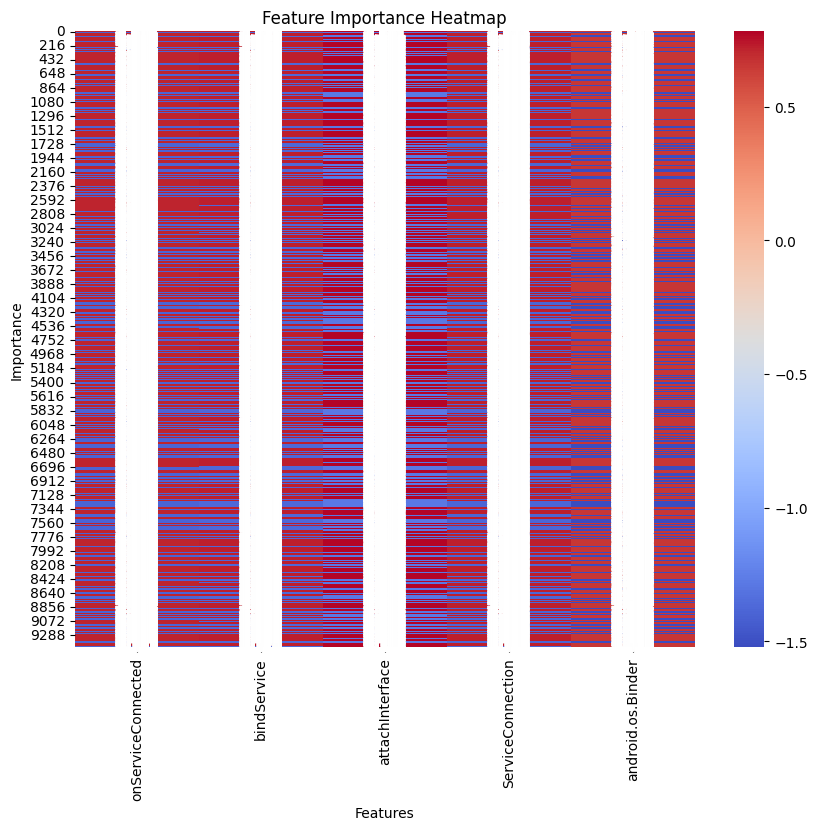

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pivot table with feature names and their importance scores
pivot_table = pd.DataFrame(selected_features, columns=selected_feature_names)

# Creating the heatmap with the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".3f")
plt.title('Feature Importance Heatmap')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


Implementing

In [74]:
from sklearn.preprocessing import MinMaxScaler

# Perform min-max scaling to scale the data to [0, 1] range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)

# Perform feature selection using chi-square
selector = SelectKBest(score_func=chi2, k=5)
selected_features = selector.fit_transform(scaled_data, data['transact'])

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = selected_data.columns[selected_indices]

# Print the names of the selected features
print("Selected Features after chi-square feature selection:")
for feature in selected_feature_names:
    print(feature)


Selected Features after chi-square feature selection:
transact
bindService
attachInterface
ServiceConnection
android.os.Binder


Selected Features after chi-square feature selection:
transact
bindService
attachInterface
ServiceConnection
android.os.Binder


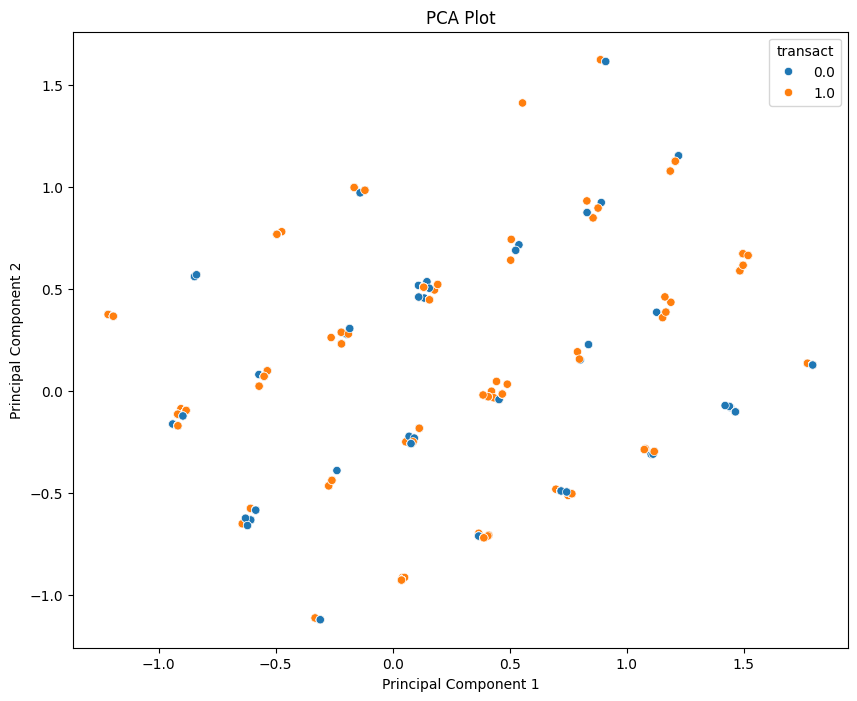

In [76]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the data from DataFrame containing the selected columns
selected_columns = ['transact', 'onServiceConnected', 'bindService', 'attachInterface',
                    'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
                    'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
                    'Ljava.lang.Class.cast']

selected_data = data[selected_columns]

# Performing feature scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)

# Performing feature selection using chi-square
selector = SelectKBest(score_func=chi2, k=5)
selected_features = selector.fit_transform(scaled_data, data['transact'])

# Getting the selected feature indices
selected_indices = selector.get_support(indices=True)

# Getting the names of the selected features
selected_feature_names = selected_data.columns[selected_indices]

# Printing the names of the selected features
print("Selected Features after chi-square feature selection:")
for feature in selected_feature_names:
    print(feature)

# Performing PCA
pca = PCA(n_components=2)  # You can choose the number of components as needed
pca_result = pca.fit_transform(scaled_data)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenating the target variable 'transact' with PCA results
pca_df = pd.concat([pca_df, data['transact']], axis=1)

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='transact', data=pca_df)
plt.title('PCA Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
